In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
# Original Parameters
frequency = 1  # Hz
nyq = 2 * frequency
amplitude = 1
sampling_rate =  100 * nyq # Hz
duration = 2  # seconds

In [217]:
sample1 = 0.5 * nyq
sample2 = nyq
sample3 = 4 * nyq

In [218]:
N = duration * sampling_rate
N1 = duration * sample1
N2 = duration * sample2
N3 = duration * sample3

In [219]:
# Time array
t = np.linspace(0, duration, int(N), endpoint=False)
t1 = np.linspace(0, duration, int(N1), endpoint=False)
t2 = np.linspace(0, duration, int(N2), endpoint=False)
t3 = np.linspace(0, duration, int(N3), endpoint=False)
# Continuous sinusoidal signal
continuous_signal = amplitude * np.sin(2 * np.pi * frequency * t+ np.pi/4)
continuous_signal1 = amplitude * np.sin(2 * np.pi * frequency * t1 + np.pi/4)
continuous_signal2 = amplitude * np.sin(2 * np.pi * frequency * t2 + np.pi/4)
continuous_signal3 = amplitude * np.sin(2 * np.pi * frequency * t3 + np.pi/4)


In [220]:
print(t3.size)

16


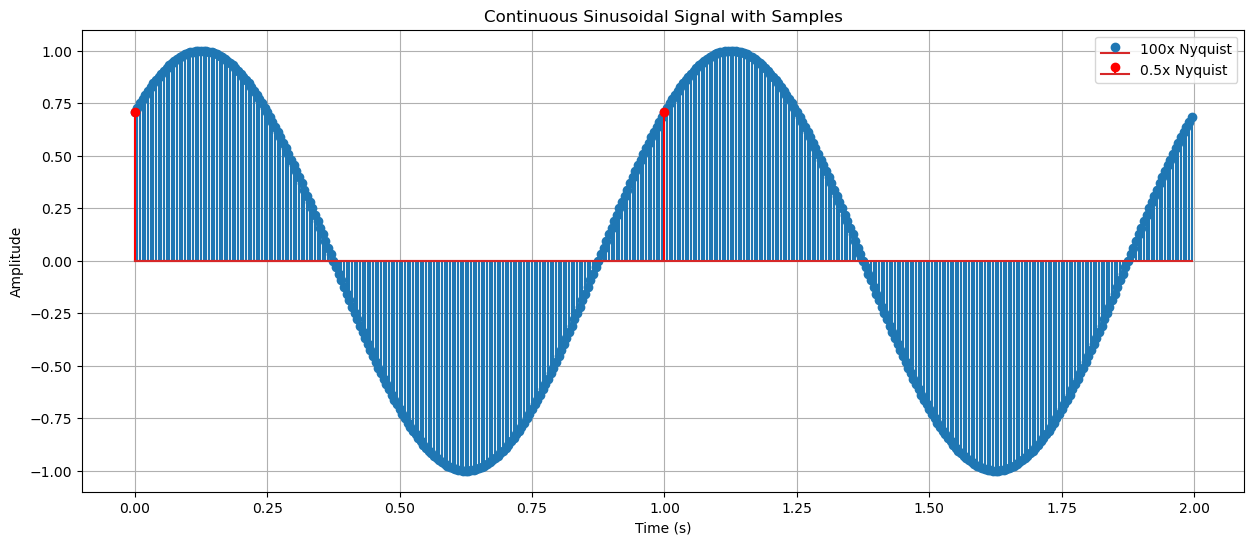

In [221]:
# Plot continuous signal with samples
#https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform
plt.figure(figsize=(15, 6))
plt.stem(t, continuous_signal, label='100x Nyquist')
plt.stem(t1, continuous_signal1, label='0.5x Nyquist', linefmt='r')
#plt.stem(t2, continuous_signal2, label='Nyquist', linefmt='m')
#plt.stem(t3, continuous_signal3, label='4x Nyquist', linefmt='y')
#plt.scatter(t[sample_indices], sampled_values, color='red', label='Samples')
plt.title('Continuous Sinusoidal Signal with Samples')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.show()

In [222]:
# fourier transform and frequency domain

Y_k = np.fft.fft(continuous_signal)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = sampling_rate*np.arange((N/2))/N; # frequency vector

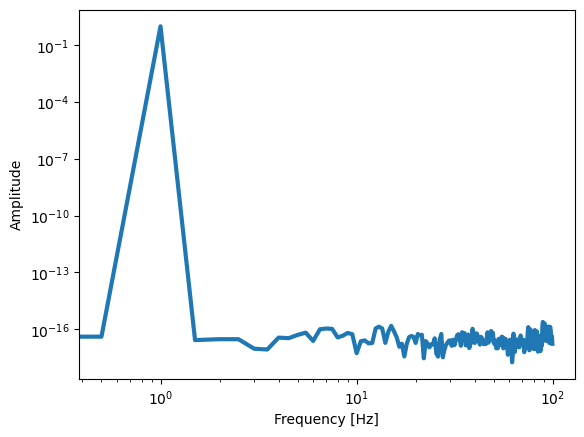

In [223]:
# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=3)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [224]:
Y_k1 = np.fft.fft(continuous_signal3)[0:int(N1/2)]/N1 # FFT function from numpy
Y_k1[1:] = 2*Y_k1[1:] # need to take the single-sided spectrum only
Pxx1 = np.abs(Y_k1) # be sure to get rid of imaginary part

f1 = sample3*np.arange((N1/2))/N1; # frequency vector

C:\Users\Carson\AppData\Local\Temp\ipykernel_17788\506625992.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


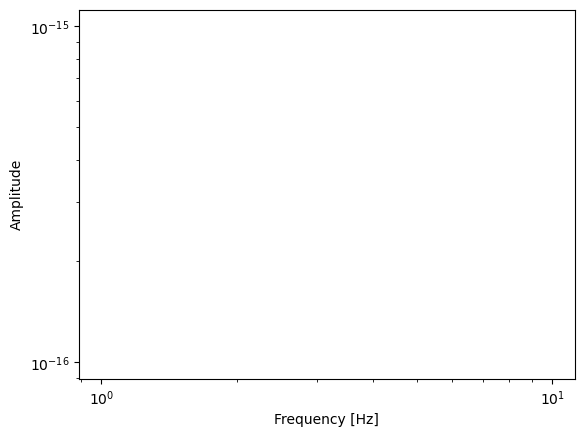

In [225]:
# plotting
fig,ax = plt.subplots()
plt.plot(f1,Pxx1,linewidth=3)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()